In [1]:
datafolder = "24-04-24"

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


In [3]:
for dirname, _, filenames in os.walk('data/24-04-24'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


data/24-04-24/Zeitposten.csv
data/24-04-24/Ressource.csv
data/24-04-24/Einsatzstelle.csv
data/24-04-24/Reklamationen.csv
data/24-04-24/Tour.csv
data/24-04-24/Auftr„ge.csv


In [4]:
def load_and_preview_dataset(name, data_folder, filename, sep=','): 
    df = pd.read_csv(f'data/{data_folder}/{filename}', sep=sep)
    print(f'Columns and data types of "{name}" dataset')
    display(df.dtypes)
    print(f'Number of rows of "{name}" dataset', len(df))
    print(f'Head of {name} dataset')
    display(df.head())
    print("\nMissing values in orders:\n", df.isnull().sum())
    return df

### tours

In [5]:
tours = load_and_preview_dataset('tours', datafolder, 'Tour.csv')

Columns and data types of "tours" dataset


%TOURNR            int64
Einsatzdatum      object
Betriebsstätte    object
%Rahmentour        int64
Rahmentourcode    object
dtype: object

Number of rows of "tours" dataset 138953
Head of tours dataset


,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode
0,12964,10.11.2023,MONU,1,TP00335
1,38897,07.02.2022,MONU,1,TP00335
2,73190,21.10.2022,MONU,1,TP00335
3,54020,06.08.2021,MONU,1,TP00335
4,78256,27.01.2023,MONU,1,TP00335



Missing values in orders:
 %TOURNR           0
Einsatzdatum      0
Betriebsstätte    1
%Rahmentour       0
Rahmentourcode    0
dtype: int64


In [6]:
tours = tours.rename(columns={
    '%TOURNR': 'tour_number',
    'Einsatzdatum': 'service_date',
    'Betriebsstätte': 'operational_site',
    '%Rahmentour': 'reference_tour_number',
    'Rahmentourcode': 'reference_tour_code'
})
display(tours.head())

,tour_number,service_date,operational_site,reference_tour_number,reference_tour_code
0,12964,10.11.2023,MONU,1,TP00335
1,38897,07.02.2022,MONU,1,TP00335
2,73190,21.10.2022,MONU,1,TP00335
3,54020,06.08.2021,MONU,1,TP00335
4,78256,27.01.2023,MONU,1,TP00335


In [7]:
tours.service_date = pd.to_datetime(tours.service_date, format='%d.%m.%Y')

### how many actual 'routes' do we have

In [8]:
print(f'the number of distinct tours is: {len(tours.reference_tour_code.unique())}')

the number of distinct tours is: 199


### lets have a look at the operational sites
does an operational site always have the same reference_tour_numb er and reference_tour_code

In [9]:
tours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138953 entries, 0 to 138952
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   tour_number            138953 non-null  int64         
 1   service_date           138953 non-null  datetime64[ns]
 2   operational_site       138952 non-null  object        
 3   reference_tour_number  138953 non-null  int64         
 4   reference_tour_code    138953 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 5.3+ MB


In [10]:
tours.operational_site.value_counts()

operational_site
MONU    138952
Name: count, dtype: int64

In [11]:
tours.reference_tour_number.value_counts()

reference_tour_number
136    3390
126    2893
51     2722
27     2708
124    2665
       ... 
191       1
193       1
192       1
190       1
199       1
Name: count, Length: 199, dtype: int64

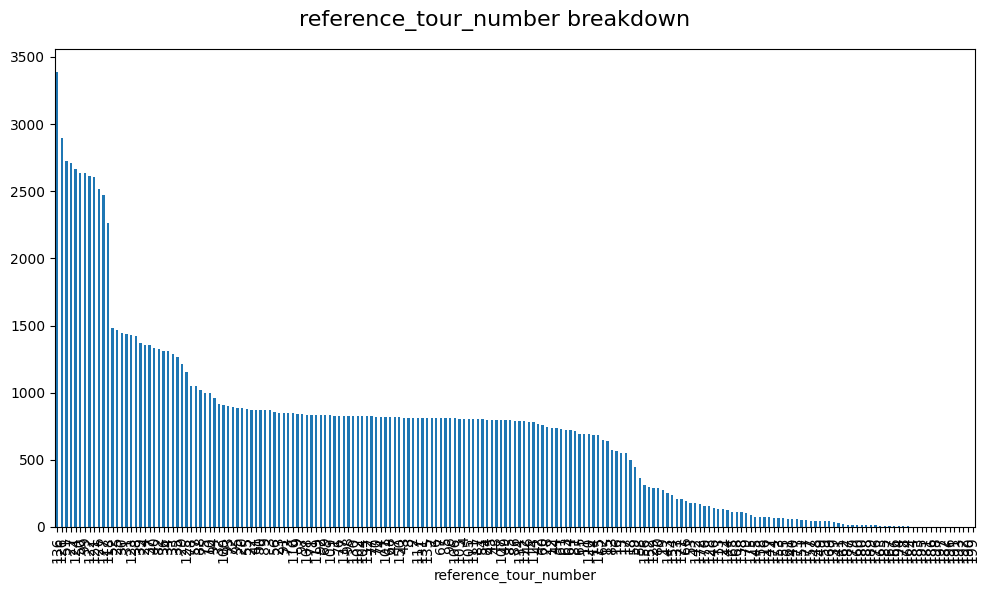

In [12]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle('reference_tour_number breakdown', fontsize=16)
tours.reference_tour_number.value_counts().plot(kind='bar', rot=90)
plt.tight_layout()

plt.show()

Reference Tour numbers have a real spread.  
Ranging from 3500 occurrences to 1
lets do the same for the reference tour code to see how that looks

In [13]:
tours.reference_tour_code.value_counts()

reference_tour_code
TCT0011       3390
TCT0008       2893
TGIGLU0712    2722
TCT0014       2708
TCT0005       2665
              ... 
TP00105          1
TP00106          1
TP00103          1
TP00104          1
TM00669          1
Name: count, Length: 199, dtype: int64

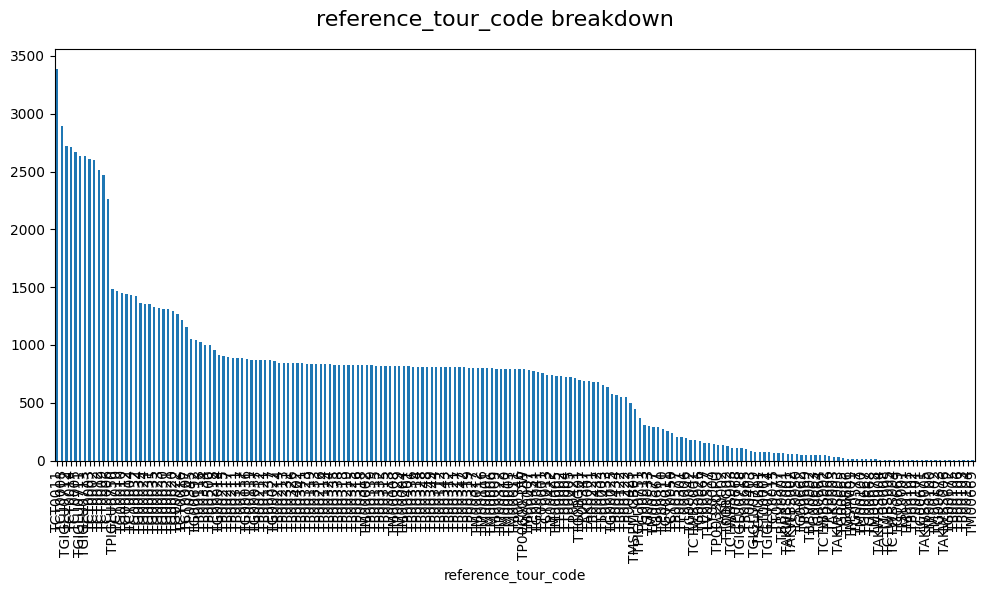

In [14]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle('reference_tour_code breakdown', fontsize=16)
tours.reference_tour_code.value_counts().plot(kind='bar', rot=90)
plt.tight_layout()

plt.show()

In [15]:
is_same = np.array_equal(tours.reference_tour_number.value_counts().values, tours.reference_tour_code.value_counts().values)

print(is_same)

True


tours.reference_tour_number and reference_tour_code are essentially the same data. just encoded differently

I want to join the reklamtion table to the Tour table
Reklmation foreign key is % TOURNR

In [16]:
reklmationen = load_and_preview_dataset('reklmationen', datafolder, 'Reklamationen.csv')

Columns and data types of "reklmationen" dataset


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_21143/1101745544.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'data/{data_folder}/{filename}', sep=sep)


%TOURNR                                 int64
Belegnr.                               object
Reklamationsgrund                       int64
Grund                                  object
Reklamationsuntergrund Beschreibung    object
dtype: object

Number of rows of "reklmationen" dataset 790425
Head of reklmationen dataset


,%TOURNR,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung
0,160016,A241067066,402,BB Deckel beschädigt,großer Deckel - Hauptdeckel
1,122761,A240871203,501,Ü Ladestelle beräumt,Mehrmengen mitgenommen (MMM)
2,97644,A240929593,501,Ü Ladestelle beräumt,Mehrmengen mitgenommen (MMM)
3,121874,A240803399,501,Ü Ladestelle beräumt,Mehrmengen mitgenommen (MMM)
4,122263,A240977660,501,Ü Ladestelle beräumt,Mehrmengen mitgenommen (MMM)



Missing values in orders:
 %TOURNR                                     0
Belegnr.                                    0
Reklamationsgrund                           0
Grund                                      24
Reklamationsuntergrund Beschreibung    557898
dtype: int64


In [43]:
auftrag = load_and_preview_dataset('auftrag', datafolder, 'Auftr„ge.csv')

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_21143/1101745544.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'data/{data_folder}/{filename}', sep=sep)


Columns and data types of "auftrag" dataset


%TOURNR                      int64
%DEBITOR%EINSATZSTELLE       int64
Auftr.Auftragsnr.           object
Auftr.Einsatzdatum          object
Auftr.Menge                 object
Auftr.Einheit               object
Auftr.Betriebsmittelnr.    float64
Auftr.Int. Stoffkatalog     object
Artikel                     object
Betriebsmittel              object
dtype: object

Number of rows of "auftrag" dataset 13242295
Head of auftrag dataset


,%TOURNR,%DEBITOR%EINSATZSTELLE,Auftr.Auftragsnr.,Auftr.Einsatzdatum,Auftr.Menge,Auftr.Einheit,Auftr.Betriebsmittelnr.,Auftr.Int. Stoffkatalog,Artikel,Betriebsmittel
0,32437,56418,A221790082,19.05.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
1,32437,56418,A221790083,19.05.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
2,82408,56418,A231849217,23.05.2023,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
3,46532,56418,A213241021,21.09.2021,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
4,25173,56418,A220934859,15.03.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen



Missing values in orders:
 %TOURNR                       0
%DEBITOR%EINSATZSTELLE        0
Auftr.Auftragsnr.             0
Auftr.Einsatzdatum            0
Auftr.Menge                   0
Auftr.Einheit                41
Auftr.Betriebsmittelnr.    5647
Auftr.Int. Stoffkatalog    5059
Artikel                    5059
Betriebsmittel             5647
dtype: int64


In [17]:
tours_reklmation = tours.merge(reklmationen, left_on='tour_number', right_on='%TOURNR', how='left')

In [18]:
print(f'how many actual complaint reasons do we have: {len(tours_reklmation.Grund.unique())}')

how many actual complaint reasons do we have: 70


Thats a lot fewer reasons that I expected

In [19]:
display(pd.DataFrame(tours_reklmation.Grund.unique()))

,0
0,BB Rad beschädigt
1,VSS Schlüssel/Code erforderlich
2,VST Tresorproblem
3,TV Transportweg versperrt
4,Behälter in Schüttung gefallen
...,...
65,Fehlverhalten allgemein
66,AFM - Meldung E-Schrott
67,Behälter nicht wieder verschlossen
68,"Fehlende RE/GS, Rechnungskopie"


23	Fahrzeugausfall/Fahrzeugwechsel
24	Tour nicht geschafft

seem the most likely. lets see how many we have

In [20]:
tour_nicht_geschafft = tours_reklmation[tours_reklmation.Grund == 'Tour nicht geschafft']

In [21]:
display(tour_nicht_geschafft.head())

,tour_number,service_date,operational_site,reference_tour_number,reference_tour_code,%TOURNR,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung
506,47060,2021-09-29,MONU,1,TP00335,47060.0,A213386316,901.0,Tour nicht geschafft,NaN
507,47060,2021-09-29,MONU,1,TP00335,47060.0,A213401251,901.0,Tour nicht geschafft,NaN
509,47060,2021-09-29,MONU,1,TP00335,47060.0,A213364845,901.0,Tour nicht geschafft,NaN
510,47060,2021-09-29,MONU,1,TP00335,47060.0,A213375624,901.0,Tour nicht geschafft,NaN
511,47060,2021-09-29,MONU,1,TP00335,47060.0,A213387375,901.0,Tour nicht geschafft,NaN


In [22]:
len(tour_nicht_geschafft)

153260

I can see that tour_nicht_geschafft has multiple entries for each indiviual tour of that day. It duplicating. lets see how many actually failed.

In [23]:
#this is telling us how many entries each one has. I guess tour_number 85366 is especially long. 
#but this is interesting in terms of prioritising which tours to focus on. If its a binary choice between doing this or that - say due to not enough staff - they should do the one that
#has the most entries.
tour_nicht_geschafft.groupby('tour_number').size().sort_values(ascending=False)

tour_number
85366    1914
7238     1662
85093    1296
85171    1278
88910    1140
         ... 
32540       1
48539       1
31833       1
41302       1
25484       1
Length: 2451, dtype: int64

#are there particular routes that are especially represented?

In [24]:
tour_nicht_geschafft.groupby(['reference_tour_code','tour_number','Reklamationsgrund']).size().sort_values(ascending=False).reset_index(name='complaint_count')

,reference_tour_code,tour_number,Reklamationsgrund,complaint_count
0,TG00012,85366,901.0,1914
1,TG00033,7238,901.0,1662
2,TG00012,85093,901.0,1296
3,TG00012,85171,901.0,1278
4,TG00033,88910,901.0,1140
...,...,...,...,...
2446,TP00332,7453,901.0,1
2447,TM00009,67111,901.0,1
2448,TP00332,80961,901.0,1
2449,TP00333,14537,901.0,1


A list of tours that were cancelled due to 'Tour nicht geschafft'

In [25]:
list_cancelled_tours = tour_nicht_geschafft.groupby(['reference_tour_code','tour_number','Reklamationsgrund']).size().sort_values(ascending=False).reset_index()['tour_number']

In [26]:
list_cancelled_tours

0       85366
1        7238
2       85093
3       85171
4       88910
        ...  
2446     7453
2447    67111
2448    80961
2449    14537
2450    22484
Name: tour_number, Length: 2451, dtype: int64

l

lets see when these cancelled tours happen, is there a seasonal componant

In [27]:
tours.head(1)

,tour_number,service_date,operational_site,reference_tour_number,reference_tour_code
0,12964,2023-11-10,MONU,1,TP00335


In [28]:
tours[tours.tour_number.isin(list_cancelled_tours)]

,tour_number,service_date,operational_site,reference_tour_number,reference_tour_code
122,47060,2021-09-29,MONU,1,TP00335
375,14094,2023-12-27,MONU,1,TP00335
384,18690,2021-04-15,MONU,1,TP00335
412,65459,2022-09-27,MONU,1,TP00335
744,54629,2021-08-16,MONU,1,TP00335
...,...,...,...,...,...
138713,23369,2021-02-09,MONU,175,TP00403
138714,23370,2021-02-16,MONU,175,TP00403
138725,23840,2021-02-10,MONU,175,TP00403
138761,14624,2021-03-29,MONU,175,TP00403


What proportion of tours get cancelled?

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.pie(tour_nicht_geschafft.Reklamationsgrund.value_counts(), labels=tour_nicht_geschafft.Reklamationsgrund.value_counts().index, autopct='%1.1f%%')

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_21143/1692281037.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


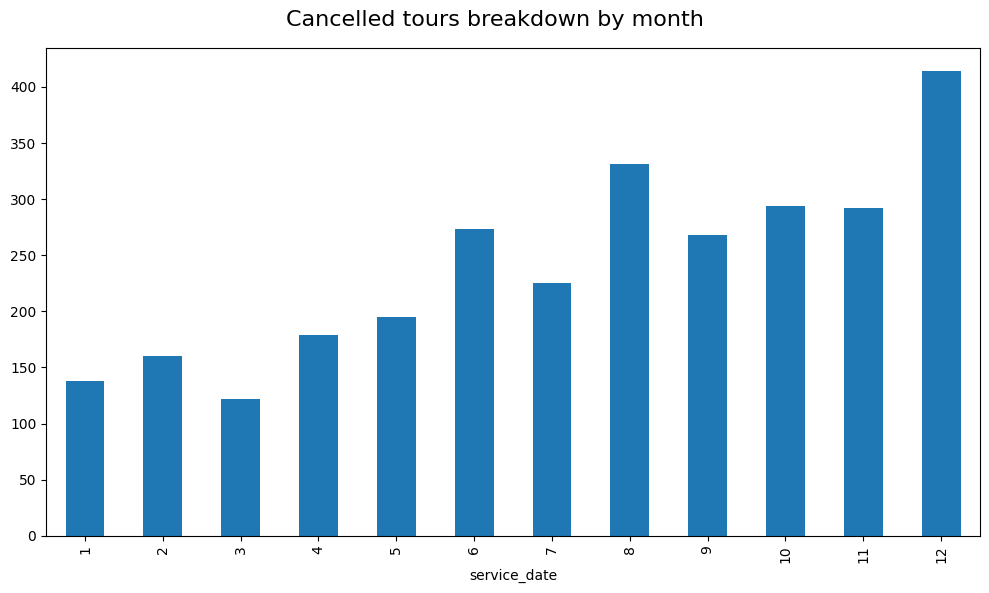

In [30]:
fig= plt.figure(figsize=(10, 6))
fig.suptitle('Cancelled tours breakdown by month', fontsize=16)
tours[tours.tour_number.isin(list_cancelled_tours)].service_date.dt.month.value_counts().sort_index().plot(kind='bar')
plt.tight_layout()
fig.show()

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_21143/3662547718.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


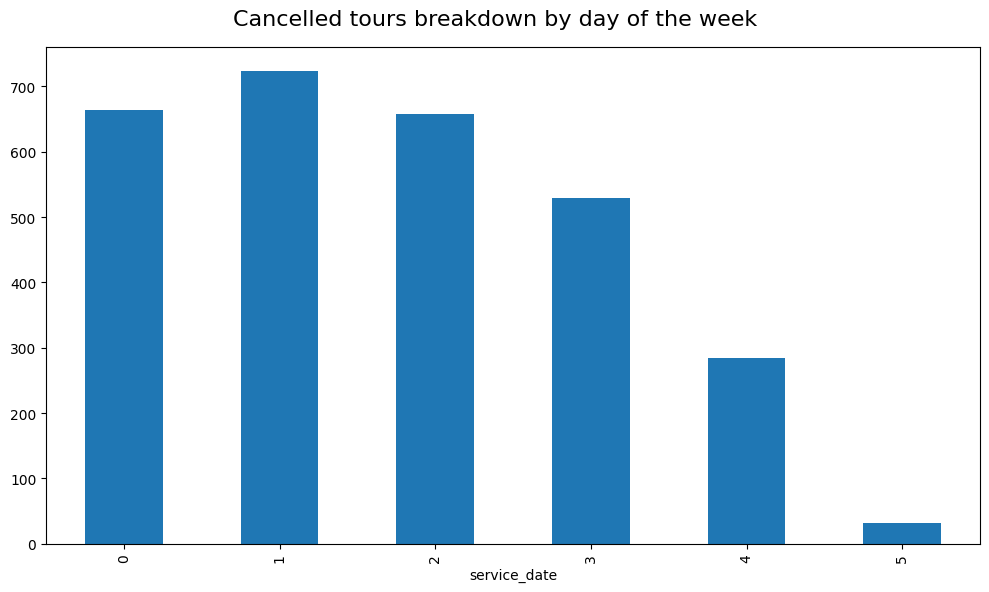

In [34]:
fig= plt.figure(figsize=(10, 6))
fig.suptitle('Cancelled tours breakdown by day of the week', fontsize=16)
tours[tours.tour_number.isin(list_cancelled_tours)].service_date.dt.day_of_week.value_counts().sort_index().plot(kind='bar')
plt.tight_layout()
fig.show()

In [35]:
tours['cancelled'] = tours.apply(lambda x: 1 if x.tour_number in list_cancelled_tours else 0, axis=1)

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_21143/3206953948.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


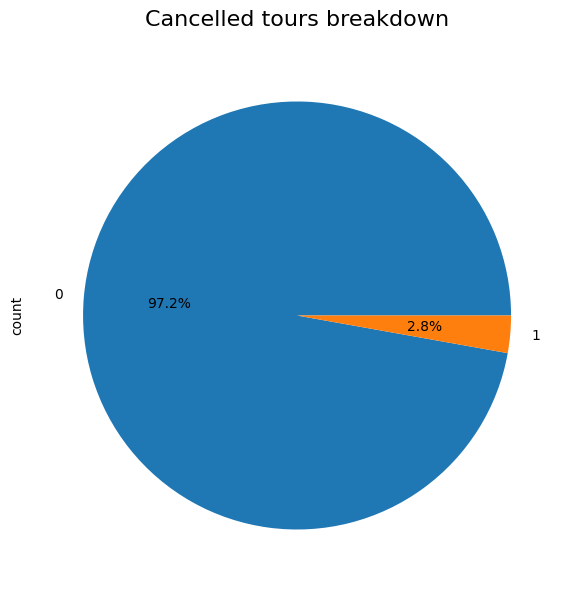

In [37]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Cancelled tours proportion', fontsize=16)
tours.cancelled.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.tight_layout()
fig.show()

In [44]:
auftrag.head(1)

,%TOURNR,%DEBITOR%EINSATZSTELLE,Auftr.Auftragsnr.,Auftr.Einsatzdatum,Auftr.Menge,Auftr.Einheit,Auftr.Betriebsmittelnr.,Auftr.Int. Stoffkatalog,Artikel,Betriebsmittel
0,32437,56418,A221790082,19.05.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen


In [48]:
auftrag.Artikel.value_counts()

Artikel
5.01 Altpapier, gemischt                   10117829
Glas bunt Duales System                     1232640
Glas weiß Duales System                     1186464
gemischte Siedlungsabfälle                   610735
1.02 Sortiertes gemischtes Papier             47989
                                             ...   
PE-Folie 50/50                                    1
Schreddervormaterial aus Bau                      1
3.14 Weißes Zeitungsdruckpapier                   1
Rindenmulch                                       1
Baumischabfall mit gefährlichen Stoffen           1
Name: count, Length: 112, dtype: int64

In [45]:
tours_auftrag = tours.merge(auftrag, left_on='tour_number', right_on='%TOURNR', how='left')

Lets compare the cancelled and non-cancelled regarding their Artikel

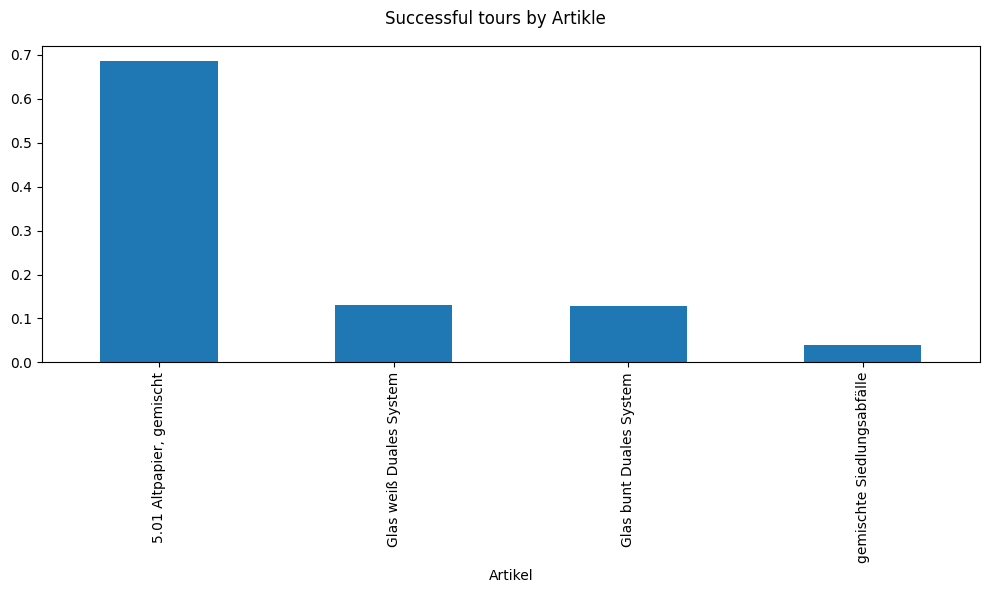

In [59]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Successful tours by Artikle')
count_threshold = .01
tours_auftrag[tours_auftrag.cancelled == 0].Artikel.value_counts(normalize= True)[lambda x: x > count_threshold].plot(kind='bar')
plt.tight_layout()
plt.show()

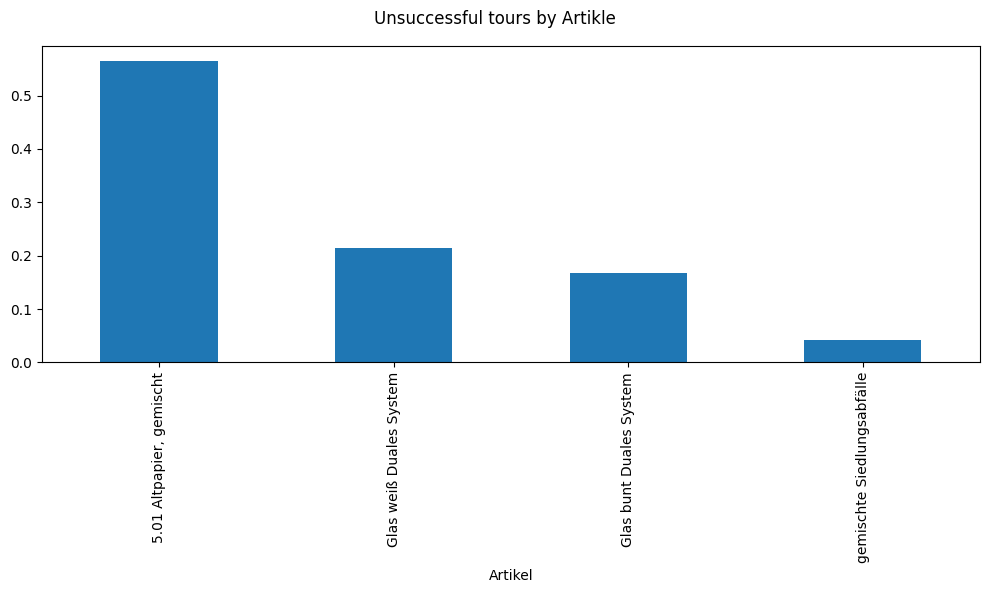

In [58]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Unsuccessful tours by Artikle')
count_threshold = .01
tours_auftrag[tours_auftrag.cancelled == 1].Artikel.value_counts(normalize=True)[lambda x: x > count_threshold].plot(kind='bar')
plt.tight_layout()
plt.show()

The proportions do seem to be off. We are more likely to see a a Glas be cancelled than another. Though we do need to run statistical tests to make sure

In [60]:
staff = load_and_preview_dataset('resource', datafolder, 'Ressource.csv')

Columns and data types of "resource" dataset


%TOURNR                    int64
%Mitarbeiternummer         int64
Zeitarbeiter_Flag          int64
Ressource.Erster Fahrer    int64
dtype: object

Number of rows of "resource" dataset 344277
Head of resource dataset


,%TOURNR,%Mitarbeiternummer,Zeitarbeiter_Flag,Ressource.Erster Fahrer
0,95350,1,0,1
1,95350,2,0,0
2,95351,3,1,0
3,95351,4,0,1
4,95351,5,0,0



Missing values in orders:
 %TOURNR                    0
%Mitarbeiternummer         0
Zeitarbeiter_Flag          0
Ressource.Erster Fahrer    0
dtype: int64


In [61]:
tours_auftrag_staff = tours_auftrag.merge(staff, left_on='tour_number', right_on='%TOURNR', how='left')

In [65]:
tours_auftrag.head()

,tour_number,service_date,operational_site,reference_tour_number,reference_tour_code,cancelled,%TOURNR,%DEBITOR%EINSATZSTELLE,Auftr.Auftragsnr.,Auftr.Einsatzdatum,Auftr.Menge,Auftr.Einheit,Auftr.Betriebsmittelnr.,Auftr.Int. Stoffkatalog,Artikel,Betriebsmittel
0,12964,2023-11-10,MONU,1,TP00335,0,12964.0,17750.0,A233972127,10.11.2023,1,Stück,10100.0,M610200,"5.01 Altpapier, gemischt",1100 L MGB
1,12964,2023-11-10,MONU,1,TP00335,0,12964.0,13677.0,A233974524,10.11.2023,2,Stück,10100.0,M610200,"5.01 Altpapier, gemischt",1100 L MGB
2,12964,2023-11-10,MONU,1,TP00335,0,12964.0,6147.0,A233959408,10.11.2023,1,Stück,10100.0,M610200,"5.01 Altpapier, gemischt",1100 L MGB
3,12964,2023-11-10,MONU,1,TP00335,0,12964.0,22607.0,A233960982,10.11.2023,2,Stück,10100.0,M610200,"5.01 Altpapier, gemischt",1100 L MGB
4,12964,2023-11-10,MONU,1,TP00335,0,12964.0,20442.0,A233959925,10.11.2023,4,Stück,10100.0,M610200,"5.01 Altpapier, gemischt",1100 L MGB


In [66]:
tours_auftrag_staff.head()

,tour_number,service_date,operational_site,reference_tour_number,reference_tour_code,cancelled,%TOURNR_x,%DEBITOR%EINSATZSTELLE,Auftr.Auftragsnr.,Auftr.Einsatzdatum,Auftr.Menge,Auftr.Einheit,Auftr.Betriebsmittelnr.,Auftr.Int. Stoffkatalog,Artikel,Betriebsmittel,%TOURNR_y,%Mitarbeiternummer,Zeitarbeiter_Flag,Ressource.Erster Fahrer
0,12964,2023-11-10,MONU,1,TP00335,0,12964.0,17750.0,A233972127,10.11.2023,1,Stück,10100.0,M610200,"5.01 Altpapier, gemischt",1100 L MGB,12964.0,433.0,0.0,0.0
1,12964,2023-11-10,MONU,1,TP00335,0,12964.0,17750.0,A233972127,10.11.2023,1,Stück,10100.0,M610200,"5.01 Altpapier, gemischt",1100 L MGB,12964.0,509.0,0.0,1.0
2,12964,2023-11-10,MONU,1,TP00335,0,12964.0,13677.0,A233974524,10.11.2023,2,Stück,10100.0,M610200,"5.01 Altpapier, gemischt",1100 L MGB,12964.0,433.0,0.0,0.0
3,12964,2023-11-10,MONU,1,TP00335,0,12964.0,13677.0,A233974524,10.11.2023,2,Stück,10100.0,M610200,"5.01 Altpapier, gemischt",1100 L MGB,12964.0,509.0,0.0,1.0
4,12964,2023-11-10,MONU,1,TP00335,0,12964.0,6147.0,A233959408,10.11.2023,1,Stück,10100.0,M610200,"5.01 Altpapier, gemischt",1100 L MGB,12964.0,433.0,0.0,0.0
